# Analysis of Foursquare Data
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing

    - import Foursquare data
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - Spatail join by Census Tract
    - merges topologies
    - map topologies
    - map Businesses
1. Part II. Data Processing
    - Performs a classifcation task on Typologies
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [271]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'Polygon', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
- import Foursquare data
- imports the Census Tract shapefile
- import Typologies
- merges topologies
- Spatail join by Census Tract
- merges topologies
- map topologies
- map Businesses
- outputs a .csv of the results
- You can refer to https://github.com/mv1742/updny_2

# Foursquare Data
- import Foursquare data

In [272]:
data = gpd.read_file('NYU_March2018_subset30.geojson')

In [273]:
X_dummies = data[list(data.columns)[-4:-1]]
print(X_dummies.shape)
X_dummies = pd.get_dummies(X_dummies)
Fq_dummies = pd.concat([data, X_dummies], axis=1, join='inner')  
Fq_dummies.shape

(106287, 3)


(106287, 716)

# Census Tract shapefile
- imports the Census Tract shapefile


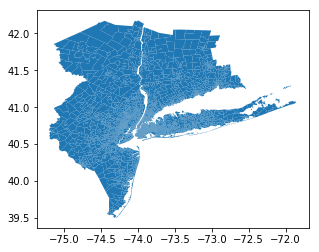

In [274]:
# url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# NYCzip = getGeoDataFrameFromShpFileZipUrl(url)
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()

In [275]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [276]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

# Typologies
- import Typologies
- merges topologies
- map topologies

In [382]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)

In [383]:
Typologiesgdp.columns

Index(['geoid', 'typology_old', 'medrent90', 'medrent00', 'medrent16',
       'medhval90', 'medhval00', 'medhval16', 'percol90', 'percol00',
       'percol16', 'pernwh90', 'pernwh00', 'pernwh16', 'perli90', 'perli00',
       'perli16', 'per_rent_90', 'per_rent_00', 'per_rent16', 'pop00', 'pop16',
       'asian_16_low', 'carcommuters_00', 'pre50_16', 'hhwch16', 'empd15',
       'density16', 'aland', 'li16', 'afford90', 'belowmedcol90',
       'abovemednwh', 'abovemedli', 'abovemedrent', 'vulnrisk90', 'vuln90',
       'afford00', 'belowmedcol00', 'abovemednwh00', 'abovemedli00',
       'abovemedrent00', 'vulnrisk00', 'vuln00', 'afford16', 'belowmedcol16',
       'abovemednwh16', 'abovemedli16', 'abovemedrent16', 'vulnrisk16',
       'vuln16', 'hotmarket90(127%-169%)', 'hotmarket00(110%-207%)',
       'percol16.1', 'edudiff0016', 'abm_dif_0016', 'edudiff9000',
       'abm_dif_9000', 'hinc90_NYU', 'hinc00_NYU', 'hinc16_NYU', 'hinc90',
       'hinc00', 'hinc16', 'pct_ch_hinc90_00', 'pct_ch_

In [278]:
Typologiesgdp['Type_1.19'].unique()

array(['VHI - Super Gentrification or Exclusion',
       'MHI - Ongoing Exclusion',
       'MHI - Stable or Early Stage of Exclusion',
       'MHI - Advanced Exclusion', 'LI - At Risk of Gentrification',
       'MHI - Advanced Gentrification',
       'LI - Not Losing Low-Income Households',
       'LI - Ongoing Displacement of Low-Income Households',
       'Missing Data', 'LI - Ongoing Gentrification', nan], dtype=object)

In [279]:
Typologiesgdp['Ongoing_adv_gent'] = Typologiesgdp['Type_1.19'].copy()
Typologiesgdp['Ongoing_adv_gent'].replace('VHI - Super Gentrification or Exclusion',1,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Ongoing Exclusion',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Stable or Early Stage of Exclusion',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Advanced Exclusion', 0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Advanced Gentrification',1,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - At Risk of Gentrification',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Ongoing Gentrification',1,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Not Losing Low-Income Households',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Ongoing Displacement of Low-Income Households',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('Missing Data',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace(nan,0,inplace=True)


In [280]:
Typologiesgdp['Ongoing_adv_gent'].value_counts().sum()

5298

In [281]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)

# Karen's Typologies

In [282]:
Typvariant=pd.read_csv('NY gentrification dependent variables.csv')
Typvariant = gpd.GeoDataFrame(Typvariant)
len(Typvariant.columns), Typvariant.shape
# Typologiesgdp.drop(columns=['Type_1.19'], inplace=True)
Typvariant.head()
print(Typvariant.columns)
Typvariant.rename(columns={'geoid':'GEOID'},inplace=True)
Typologiesgdp = Typologiesgdp.drop(columns = ['gent00_16', 'gent90_00']).merge(Typvariant, on= 'GEOID')
Typvariant.isnull().sum()


Index(['geoid', 'gent90_00', 'gent00_16', 'Supergent16'], dtype='object')


GEOID            0
gent90_00       75
gent00_16       75
Supergent16    102
dtype: int64

In [283]:
# Typologiesgdp

# NEW BINARY TYPOLOGIES

In [308]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','medrent00','medrent16',
            'medhval00','medhval16','hinc00','hinc16','pct_ch_hinc00_16',
           'gent00_16', 'gent90_00','Supergent16','Ongoing_adv_gent']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typ_Bin = Typologiesgdp.loc[:,cols_typ].copy()
Typ_Bin.head()


<class 'numpy.float64'>


,GEOID,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,pct_ch_hinc00_16,gent00_16,gent90_00,Supergent16,Ongoing_adv_gent
0,9.001010e+09,1601.0,1510.0,1000001.0,1494000.0,273976.05,150655.0,-0.450116,0.0,0.0,1.0,1.0
1,9.001010e+09,1244.0,1628.0,1000000.0,2000000.0,290000.00,250000.0,-0.137931,0.0,0.0,0.0,1.0
2,9.001010e+09,833.0,2113.0,1000000.0,2000000.0,290000.00,212448.0,-0.267421,0.0,0.0,0.0,1.0
3,9.001010e+09,1791.0,2250.0,769300.0,1459900.0,157543.95,187875.0,0.192524,0.0,0.0,0.0,1.0
4,9.001010e+09,1967.0,1900.0,1000001.0,2000001.0,246540.60,221250.0,-0.102582,0.0,0.0,0.0,1.0


In [309]:
Typ_Bin.pct_ch_hinc00_16= Typ_Bin.pct_ch_hinc00_16.replace(nan,Typ_Bin.pct_ch_hinc00_16.mean())
Typ_Bin.medhval00= Typ_Bin.medhval00.replace(nan,Typ_Bin.medhval00.mean())
Typ_Bin.medhval16= Typ_Bin.medhval16.replace(nan,Typ_Bin.medhval16.mean())
Typ_Bin.medrent00= Typ_Bin.medrent00.replace(nan,Typ_Bin.medrent00.mean())
Typ_Bin.medrent16= Typ_Bin.medrent16.replace(nan,Typ_Bin.medrent16.mean())

Typ_Bin.medhval00= Typ_Bin.medhval00.replace(0,Typ_Bin.medhval00.mean())
Typ_Bin.medhval16= Typ_Bin.medhval16.replace(0,Typ_Bin.medhval16.mean())
Typ_Bin.medrent00= Typ_Bin.medrent00.replace(0,Typ_Bin.medrent00.mean())
Typ_Bin.medrent16= Typ_Bin.medrent16.replace(0,Typ_Bin.medrent16.mean())

print(Typ_Bin.medrent16.isnull().sum())
print(Typ_Bin.medrent16.describe())
print(Typ_Bin.medhval16.isnull().sum())
print(Typ_Bin.medhval16.describe())
print(Typ_Bin.medrent00.isnull().sum())
print(Typ_Bin.medrent00.describe())
print(Typ_Bin.medhval00.isnull().sum())
print(Typ_Bin.medhval00.describe())

0
count    5294.000000
mean     1428.989658
std       459.131843
min        99.000000
25%      1166.000000
50%      1366.500000
75%      1600.000000
max      3501.000000
Name: medrent16, dtype: float64
0
count    5.294000e+03
mean     4.621984e+05
std      2.599954e+05
min      2.310000e+04
25%      2.987000e+05
50%      4.168000e+05
75%      5.507750e+05
max      2.000001e+06
Name: medhval16, dtype: float64
0
count    5294.000000
mean      843.613407
std       281.426254
min       175.000000
25%       689.000000
50%       795.000001
75%       942.000000
max      2001.000000
Name: medrent00, dtype: float64
0
count    5.294000e+03
mean     2.205722e+05
std      1.257103e+05
min      9.999000e+03
25%      1.513000e+05
50%      1.941000e+05
75%      2.527750e+05
max      1.000001e+06
Name: medhval00, dtype: float64


In [310]:
# CREATE
Typ_Bin['pct_ch_medhval00_16'] = (Typ_Bin.medhval16-Typ_Bin.medhval00)/Typ_Bin.medhval00
Typ_Bin['pct_ch_medrent00_16'] = (Typ_Bin.medrent16-Typ_Bin.medrent00)/Typ_Bin.medrent00

In [311]:
# CLEAN
# ALL TO SAME SIZE

In [312]:
Typ_Bin =Typ_Bin.dropna(how='all',axis=0)
print(Typ_Bin.shape)
Typ_Bin = Typ_Bin.dropna(axis=0)
print(Typ_Bin.shape)
cols_X = [i for i in Typ_Bin.columns] #if (i != 'pct_ch_hinc00_16')&(i != 'GEOID')]
print(cols_X)

(5294, 14)
(5178, 14)
['GEOID', 'medrent00', 'medrent16', 'medhval00', 'medhval16', 'hinc00', 'hinc16', 'pct_ch_hinc00_16', 'gent00_16', 'gent90_00', 'Supergent16', 'Ongoing_adv_gent', 'pct_ch_medhval00_16', 'pct_ch_medrent00_16']


In [313]:
# # Explore 
      
# plt.figure(1)
# plt.subplot(3,1,3)
# Typ_Bin.pct_ch_hinc00_16.hist(ax=plt.gca(), figsize = (20,15))
# plt.subplot(3,1,1)
# Typ_Bin.pct_ch_medhval00_16.hist(ax=plt.gca()) #no need to specify for first axis
# plt.subplot(3,1,2)
# Typ_Bin.pct_ch_medrent00_16.hist(ax=plt.gca())
# Typ_Bin.pct_ch_medrent00_16.hist(ax=plt.gca())

In [314]:
print(Typ_Bin.pct_ch_medhval00_16.isnull().sum())
print(Typ_Bin.pct_ch_medhval00_16.describe())
print(Typ_Bin.pct_ch_medrent00_16.isnull().sum())
print(Typ_Bin.pct_ch_medrent00_16.describe())

0
count    5178.000000
mean        1.281832
std         2.143959
min        -0.735748
25%         0.754896
50%         0.972684
75%         1.347877
max        47.134813
Name: pct_ch_medhval00_16, dtype: float64
0
count    5178.000000
mean        0.749132
std         0.544095
min        -0.934783
25%         0.516336
50%         0.697070
75%         0.892620
max        19.000000
Name: pct_ch_medrent00_16, dtype: float64


In [315]:
Typ_Bin['pct_ch_medhval00_16_binary'] = (Typ_Bin.pct_ch_medhval00_16> Typ_Bin.pct_ch_medhval00_16.std())
print((Typ_Bin.pct_ch_medhval00_16_binary> Typ_Bin.pct_ch_medhval00_16_binary.std()).sum())
print((Typ_Bin.pct_ch_medhval00_16_binary> Typ_Bin.pct_ch_medhval00_16_binary.std()).sum()/len(mergedgpd))
Typ_Bin.pct_ch_medhval00_16_binary.replace(False,0, inplace=True)
Typ_Bin.pct_ch_medhval00_16_binary.replace(True,1, inplace=True)
Typ_Bin.pct_ch_medhval00_16_binary  = pd.to_numeric(Typ_Bin.pct_ch_medhval00_16_binary)

407
0.0782241014799


In [367]:
Typ_Bin.pct_ch_medrent00_16.std(),Typ_Bin.pct_ch_medhval00_16.std()

(0.5440950790515908, 2.14395929962014)

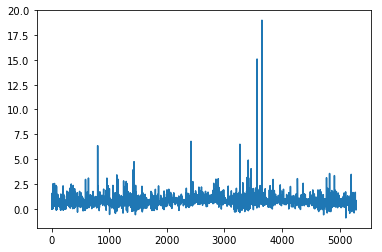

In [375]:
Typ_Bin.pct_ch_medrent00_16.plot()

In [316]:
Typ_Bin['pct_ch_medrent00_16_binary'] = (Typ_Bin.pct_ch_medrent00_16> Typ_Bin.pct_ch_medrent00_16.std())
print((Typ_Bin.pct_ch_medrent00_16_binary> Typ_Bin.pct_ch_medrent00_16_binary.std()).sum())
print((Typ_Bin.pct_ch_medrent00_16_binary> Typ_Bin.pct_ch_medrent00_16_binary.std()).sum()/len(Typ_Bin))
Typ_Bin.pct_ch_medrent00_16_binary.replace(False,0, inplace=True)
Typ_Bin.pct_ch_medrent00_16_binary.replace(True,1, inplace=True)
Typ_Bin.pct_ch_medrent00_16_binary  = pd.to_numeric(Typ_Bin.pct_ch_medrent00_16_binary)

3705
0.715527230591


In [317]:
Typ_Bin['pct_ch_hinc00_16_binary'] = (Typ_Bin.pct_ch_hinc00_16> Typ_Bin.pct_ch_hinc00_16.std())

print((Typ_Bin.pct_ch_hinc00_16_binary> Typ_Bin.pct_ch_hinc00_16_binary.std()).sum())
print((Typ_Bin.pct_ch_hinc00_16_binary> Typ_Bin.pct_ch_hinc00_16_binary.std()).sum()/len(mergedgpd))
Typ_Bin.pct_ch_hinc00_16_binary.replace(False,0, inplace=True)
Typ_Bin.pct_ch_hinc00_16_binary.replace(True,1, inplace=True)
Typ_Bin.pct_ch_hinc00_16_binary  = pd.to_numeric(Typ_Bin.pct_ch_hinc00_16_binary)

501
0.096290601576


# Visualize ALL

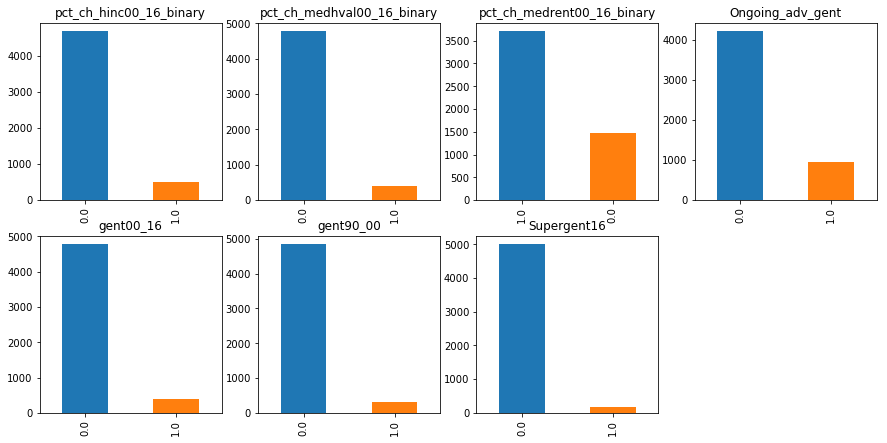

In [329]:
bin_typs = ['pct_ch_hinc00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','Ongoing_adv_gent',
            'gent00_16','gent90_00','Supergent16']
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    Typ_Bin[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    Typ_Bin[column].value_counts()/Typ_Bin[column].value_counts().sum()

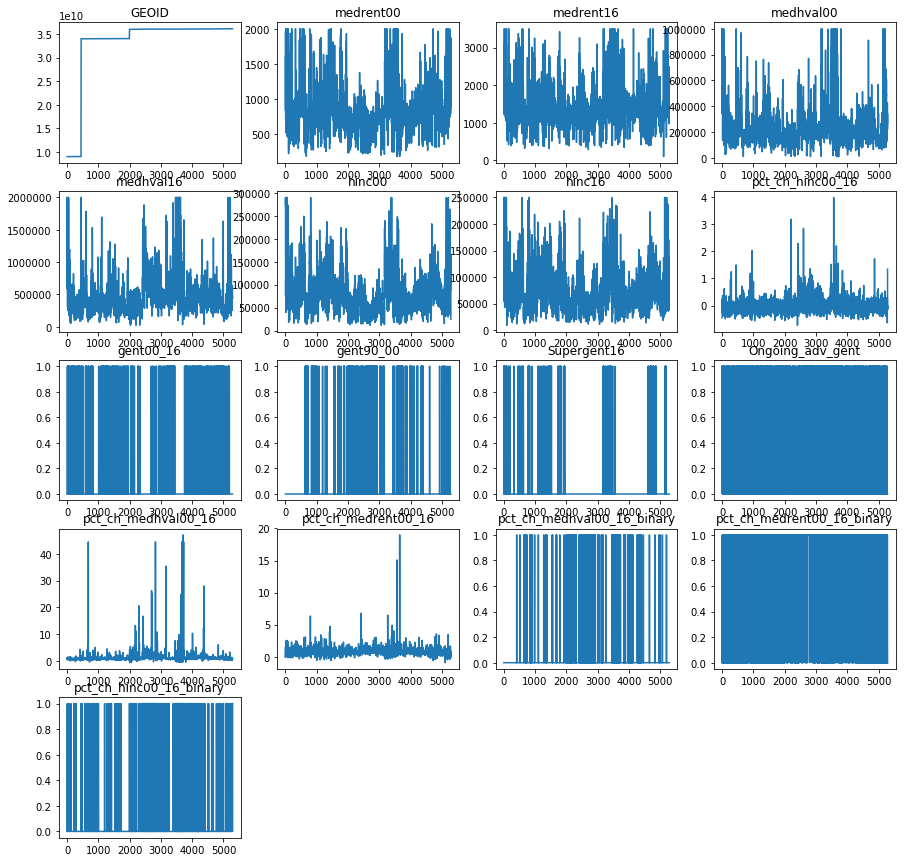

In [378]:
for i, column in enumerate(Typ_Bin.columns):
    plt.figure(1)
    plt.subplot(5,4,i+1)
    Typ_Bin[column].plot(figsize = (15,15), title=column)

In [352]:
# print(column)
# Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]]


157.0

In [373]:
matches = {}
for i, column_1 in enumerate(bin_typs):
    matches[column_1] = []
    for k, column_2 in enumerate(bin_typs):
#         if i == k:
#             continue
#         else:
        matches[column_1].append(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count())
        print(column_1+' matches with '+column_2+'\t\t\t'+str(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count())+' times')
pd.DataFrame(matches).corr()

pct_ch_hinc00_16_binary matches with pct_ch_hinc00_16_binary			5178 times
pct_ch_hinc00_16_binary matches with pct_ch_medhval00_16_binary			4584 times
pct_ch_hinc00_16_binary matches with pct_ch_medrent00_16_binary			1920 times
pct_ch_hinc00_16_binary matches with Ongoing_adv_gent			4012 times
pct_ch_hinc00_16_binary matches with gent00_16			4362 times
pct_ch_hinc00_16_binary matches with gent90_00			4517 times
pct_ch_hinc00_16_binary matches with Supergent16			4533 times
pct_ch_medhval00_16_binary matches with pct_ch_hinc00_16_binary			4584 times
pct_ch_medhval00_16_binary matches with pct_ch_medhval00_16_binary			5178 times
pct_ch_medhval00_16_binary matches with pct_ch_medrent00_16_binary			1824 times
pct_ch_medhval00_16_binary matches with Ongoing_adv_gent			4008 times
pct_ch_medhval00_16_binary matches with gent00_16			4380 times
pct_ch_medhval00_16_binary matches with gent90_00			4617 times
pct_ch_medhval00_16_binary matches with Supergent16			4603 times
pct_ch_medrent00_16_binar

,Ongoing_adv_gent,Supergent16,gent00_16,gent90_00,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary
Ongoing_adv_gent,1.000000,0.890132,0.936432,0.906747,0.765304,0.774064,-0.921383
Supergent16,0.890132,1.000000,0.970113,0.965725,0.929915,0.943559,-0.995123
gent00_16,0.936432,0.970113,1.000000,0.933267,0.879400,0.887043,-0.981930
gent90_00,0.906747,0.965725,0.933267,1.000000,0.921337,0.940247,-0.975388
pct_ch_hinc00_16_binary,0.765304,0.929915,0.879400,0.921337,1.000000,0.947698,-0.928785
pct_ch_medhval00_16_binary,0.774064,0.943559,0.887043,0.940247,0.947698,1.000000,-0.942764
pct_ch_medrent00_16_binary,-0.921383,-0.995123,-0.981930,-0.975388,-0.928785,-0.942764,1.000000


In [339]:
merged = NYCzip.merge(Typ_Bin,on='GEOID')
list(merged.columns)
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (5178, 18)


(5178, 18)

In [ ]:
for i, column_1 in enumerate(bin_typs):
    print('-----------------------------------------------------------------------------')
    print('Blank areas shows point were typologies do not match')
    print(column_1+ ' MATCHES')
    plt.figure(i)
    for k, column_2 in enumerate(bin_typs):
        if i == k:
            continue
        else:
            
            ax = plt.subplot(4,4,k+1)
            mergedgpd[mergedgpd[column_1] /
                      == mergedgpd[column_2]].plot(column=column_1,title=column_1+/
                                                   ' matches with '+column_2+' at:'legend = True,figsize=(5, 5), ax=ax)
            plt.show()

In [359]:
cols_typ = bin_typs+ ['GEOID']
output_mergedgpd = mergedgpd.loc[:,cols_typ].copy()


In [360]:
output_mergedgpd.to_csv('NEW_5_BINARIES.csv')

In [363]:
print(output_mergedgpd.shape)
output_mergedgpd.tail()

(5178, 8)


,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16,GEOID
5173,1.0,1.0,1.0,0.0,0.0,0.0,0.0,36061021400
5174,1.0,0.0,1.0,1.0,0.0,1.0,0.0,36061021800
5175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36061021900
5176,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36061022102
5177,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36047152200


In [ ]:
# END OF TYPOLOGIES DEFINITION